Practicing with the `wine` dataset.

Introducing Pandas dataframes.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets 
import scipy as sp
import pandas as pd

## Demo

In [4]:
d = datasets.load_wine(as_frame=True)

In [5]:
d.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
def compute_corr_coefficients(d):
    
    entries = []
    
    for i, feature_i in enumerate(d.data.columns):

        for j in range(i + 1, len(d.data.columns)):
            feature_j = d.data.columns[j]

            x = d.data[feature_i]
            y = d.data[feature_j]

            corr_coef, _ = sp.stats.pearsonr(x, y)
            
            entry = (feature_i, feature_j, corr_coef, np.abs(corr_coef))
            entries.append(entry)

    df = pd.DataFrame(entries, columns=['feature_1', 'feature_2', 'correlation', 'correlation_abs'])
    
    return df.sort_values(by=['correlation_abs'], ascending=False)

In [7]:
corr_df = compute_corr_coefficients(d)

corr_df

,feature_1,feature_2,correlation,correlation_abs
50,total_phenols,flavanoids,0.864564,0.864564
61,flavanoids,od280/od315_of_diluted_wines,0.787194,0.787194
55,total_phenols,od280/od315_of_diluted_wines,0.699949,0.699949
58,flavanoids,proanthocyanins,0.652692,0.652692
11,alcohol,proline,0.643720,0.643720
...,...,...,...,...
14,malic_acid,magnesium,-0.054575,0.054575
68,proanthocyanins,color_intensity,-0.025250,0.025250
38,alcalinity_of_ash,color_intensity,0.018732,0.018732
28,ash,proanthocyanins,0.009652,0.009652


In [8]:
pair_1 = corr_df.iloc[0]
pair_2 = corr_df.iloc[1]

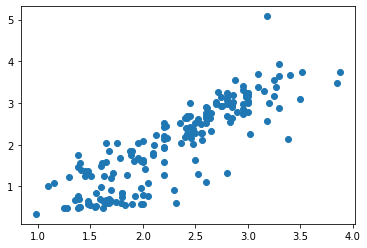

In [9]:
_ = plt.scatter(d.data[pair_1.feature_1], d.data[pair_1.feature_2])

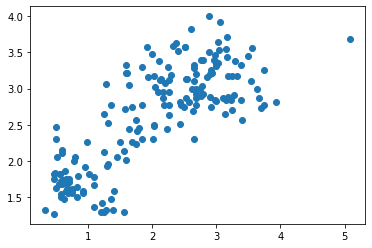

In [10]:
_ = plt.scatter(d.data[pair_2.feature_1], d.data[pair_2.feature_2])

In [11]:
f1 = d.data[pair_1.feature_1]
f2 = d.data[pair_1.feature_2]

coefs_estimated = np.polyfit(f1, f2, deg=1)
fitted_polynomial = np.poly1d(coefs_estimated)

print(coefs_estimated)

[ 1.37984391 -1.13762716]


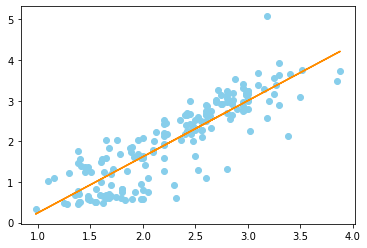

In [12]:
plt.scatter(f1, f2, color='skyblue')
plt.plot(f1, fitted_polynomial(f1), color='darkorange')
plt.show()